In [13]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
# import seaborn as sns
from numpy import sort
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import random
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [30]:
data_path = "F:\\Users\\ivann_000\\AnacondaProjects\\MLBootcamp4\\data"
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)

Feature ranking:
1. feature 11 (0.019470)
2. feature 4 (0.013298)
3. feature 52 (0.012980)
4. feature 86 (0.012694)
5. feature 151 (0.012089)
6. feature 35 (0.011739)
7. feature 156 (0.011485)
8. feature 48 (0.010594)
9. feature 91 (0.010499)
10. feature 21 (0.010403)
11. feature 65 (0.010308)
12. feature 145 (0.010117)
13. feature 173 (0.009640)
14. feature 192 (0.009640)
15. feature 93 (0.009512)
16. feature 153 (0.009512)
17. feature 37 (0.009290)
18. feature 160 (0.009258)
19. feature 40 (0.009162)
20. feature 87 (0.009067)
21. feature 67 (0.008908)
22. feature 106 (0.008812)
23. feature 25 (0.008685)
24. feature 149 (0.008526)
25. feature 3 (0.008208)
26. feature 189 (0.008112)
27. feature 132 (0.008017)
28. feature 196 (0.007699)
29. feature 100 (0.007635)
30. feature 24 (0.007540)
31. feature 96 (0.007508)
32. feature 53 (0.007285)
33. feature 209 (0.007126)
34. feature 92 (0.007094)
35. feature 54 (0.007063)
36. feature 107 (0.007031)
37. feature 88 (0.006999)
38. feature 9 (0.

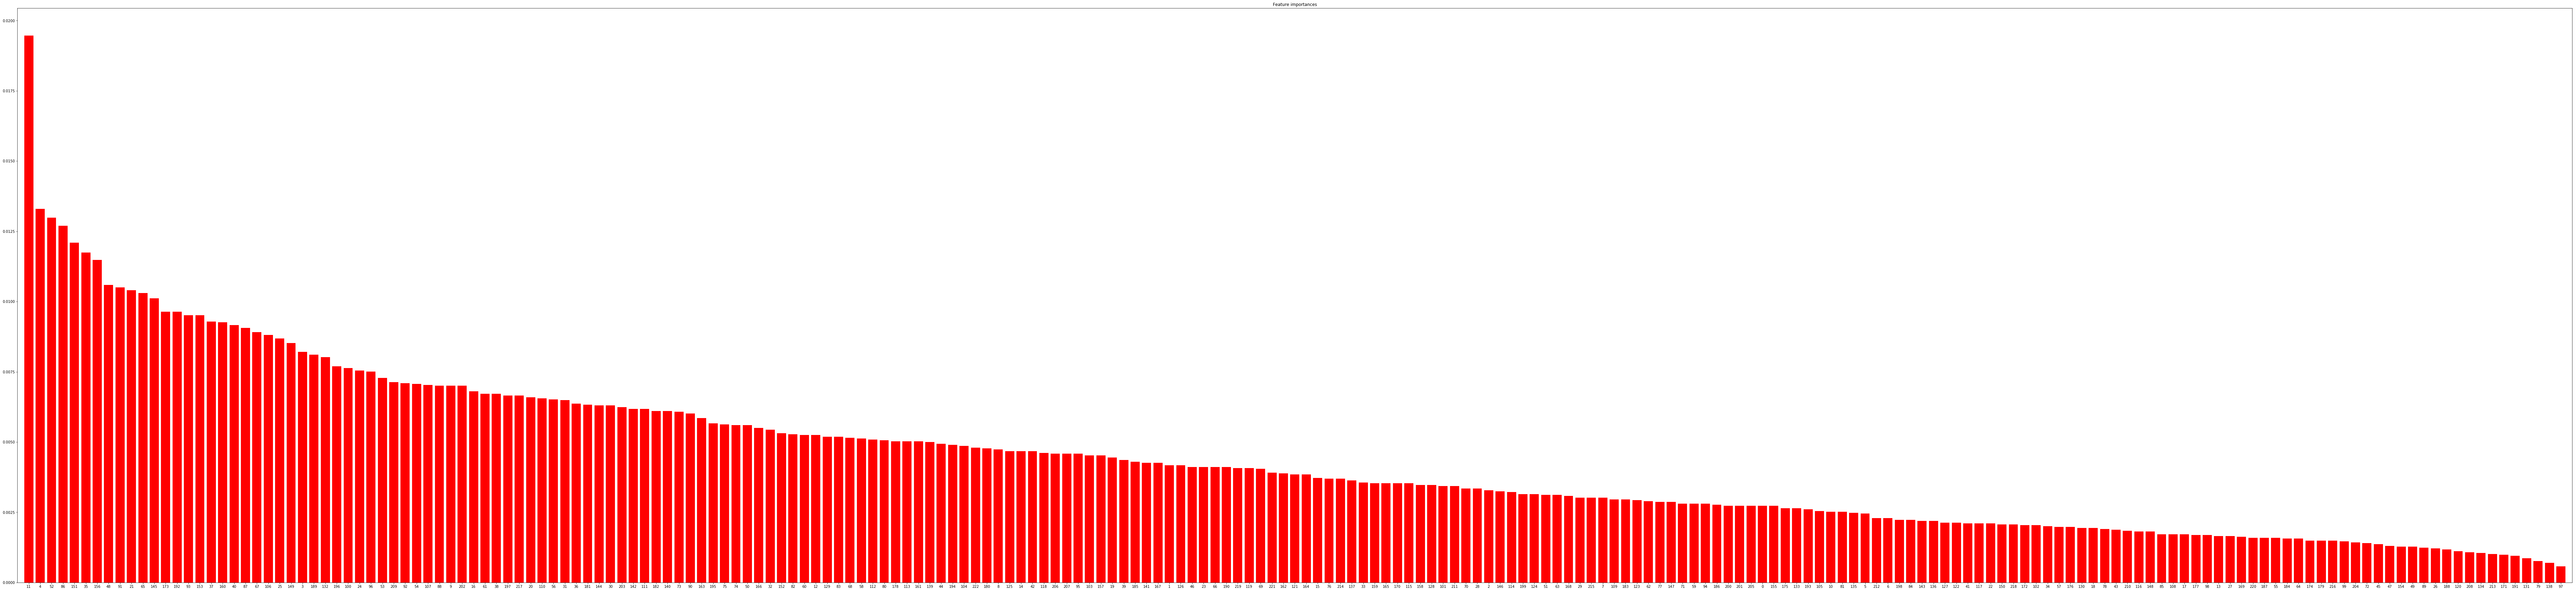

0.96761223407969599

In [34]:
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)
yy = (y[0] == 0)*1

model = XGBClassifier(n_estimators=1200,
                               nthread=8,
                               max_depth=15,
                                learning_rate=0.01,
                                colsample_bytree=0.5,
                               seed=4242)
model.fit(X, yy)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(130,30))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()



cross_val_score(model, X, yy, scoring='accuracy', cv=3).mean()

Feature ranking:
1. feature 11 (0.011415)
2. feature 173 (0.010767)
3. feature 207 (0.010371)
4. feature 24 (0.009799)
5. feature 31 (0.009220)
6. feature 194 (0.009075)
7. feature 4 (0.008786)
8. feature 156 (0.008679)
9. feature 166 (0.008542)
10. feature 14 (0.008489)
11. feature 65 (0.008443)
12. feature 93 (0.008214)
13. feature 75 (0.008199)
14. feature 38 (0.008199)
15. feature 110 (0.008115)
16. feature 3 (0.008115)
17. feature 96 (0.008100)
18. feature 182 (0.008039)
19. feature 161 (0.007948)
20. feature 145 (0.007879)
21. feature 53 (0.007848)
22. feature 21 (0.007848)
23. feature 80 (0.007818)
24. feature 88 (0.007818)
25. feature 25 (0.007803)
26. feature 203 (0.007749)
27. feature 100 (0.007734)
28. feature 52 (0.007727)
29. feature 9 (0.007688)
30. feature 48 (0.007666)
31. feature 132 (0.007620)
32. feature 153 (0.007589)
33. feature 67 (0.007567)
34. feature 0 (0.007467)
35. feature 192 (0.007460)
36. feature 151 (0.007346)
37. feature 86 (0.007315)
38. feature 189 (0.

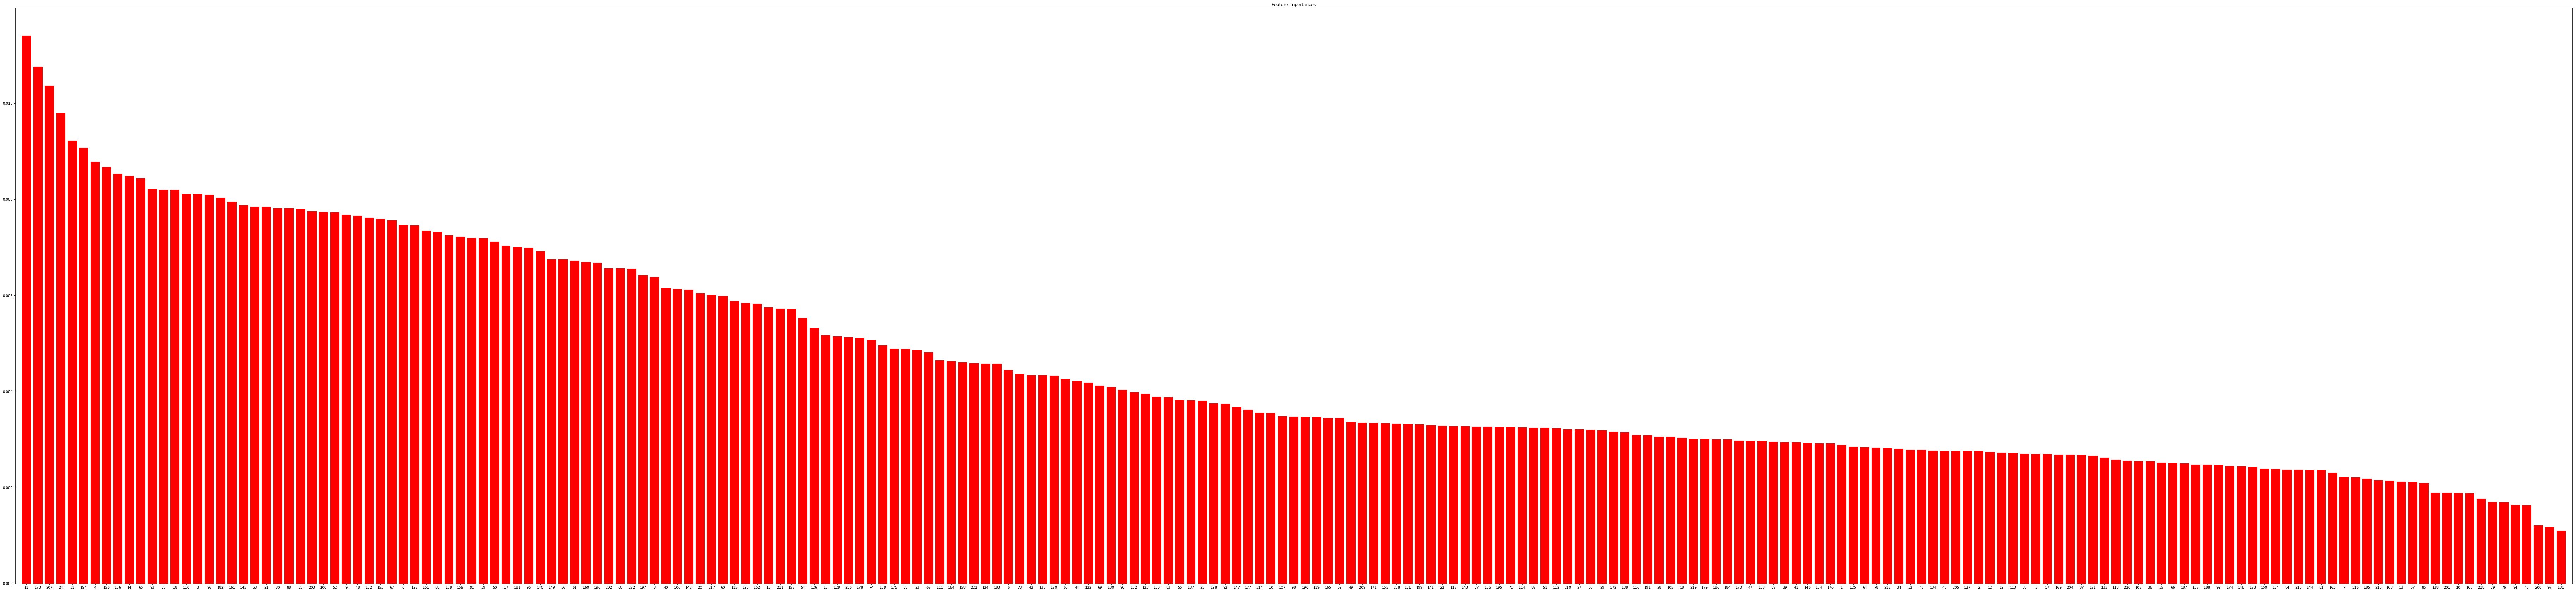

0.74835196331327014

In [36]:
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)
yy = (y[0] == 1)*1

model = XGBClassifier(n_estimators=1200,
                               nthread=8,
                               max_depth=15,
                                learning_rate=0.01,
                                colsample_bytree=0.5,
                               seed=4242)
model.fit(X, yy)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(130,30))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()



cross_val_score(model, X, yy, scoring='accuracy', cv=3).mean()

Feature ranking:
1. feature 166 (0.009809)
2. feature 173 (0.009637)
3. feature 24 (0.009337)
4. feature 48 (0.008741)
5. feature 194 (0.008686)
6. feature 192 (0.008680)
7. feature 65 (0.008582)
8. feature 37 (0.008539)
9. feature 53 (0.008508)
10. feature 160 (0.008477)
11. feature 202 (0.008477)
12. feature 207 (0.008477)
13. feature 40 (0.008453)
14. feature 4 (0.008440)
15. feature 145 (0.008422)
16. feature 31 (0.008391)
17. feature 21 (0.008385)
18. feature 3 (0.008336)
19. feature 159 (0.008275)
20. feature 196 (0.008238)
21. feature 132 (0.008176)
22. feature 86 (0.008158)
23. feature 11 (0.008146)
24. feature 50 (0.008140)
25. feature 88 (0.008121)
26. feature 80 (0.008078)
27. feature 38 (0.007968)
28. feature 203 (0.007955)
29. feature 9 (0.007894)
30. feature 189 (0.007882)
31. feature 95 (0.007863)
32. feature 110 (0.007827)
33. feature 100 (0.007777)
34. feature 161 (0.007692)
35. feature 91 (0.007618)
36. feature 67 (0.007575)
37. feature 197 (0.007556)
38. feature 75 (

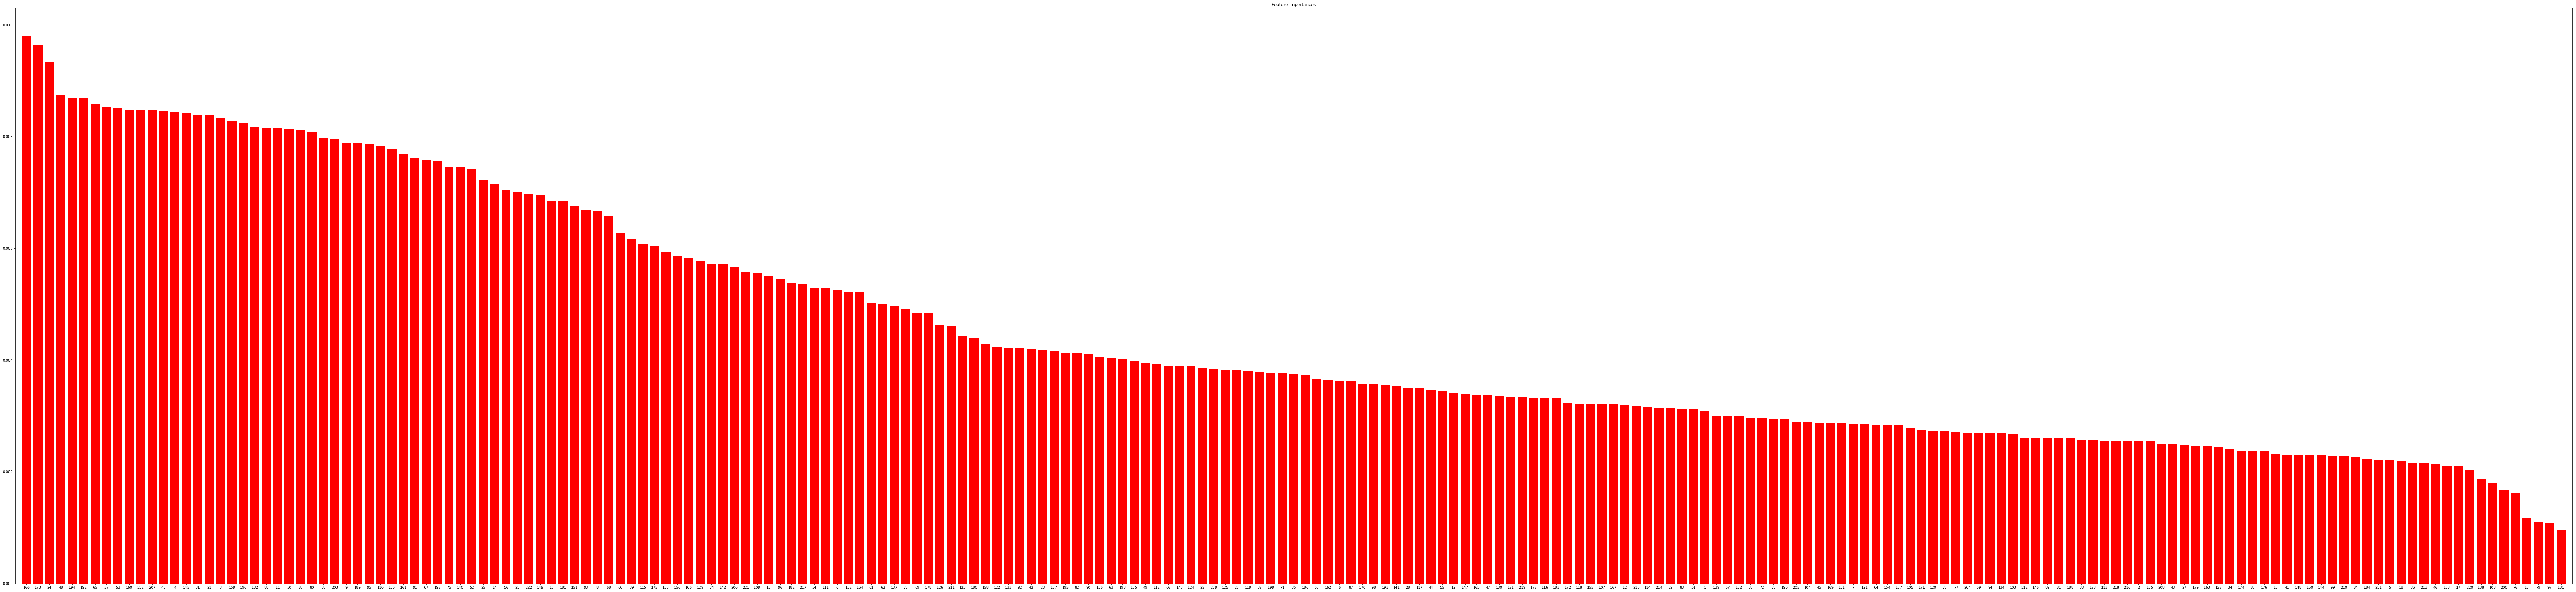

0.61679564345084559

In [37]:
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)
yy = (y[0] == 2)*1

model = XGBClassifier(n_estimators=1200,
                               nthread=8,
                               max_depth=15,
                                learning_rate=0.01,
                                colsample_bytree=0.5,
                               seed=4242)
model.fit(X, yy)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(130,30))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()



cross_val_score(model, X, yy, scoring='accuracy', cv=3).mean()

Feature ranking:
1. feature 11 (0.013705)
2. feature 173 (0.010641)
3. feature 132 (0.010631)
4. feature 96 (0.010610)
5. feature 159 (0.010310)
6. feature 50 (0.009813)
7. feature 3 (0.008809)
8. feature 182 (0.008778)
9. feature 53 (0.008685)
10. feature 40 (0.008633)
11. feature 192 (0.008488)
12. feature 189 (0.008468)
13. feature 145 (0.008395)
14. feature 95 (0.008354)
15. feature 20 (0.008333)
16. feature 156 (0.008250)
17. feature 91 (0.008198)
18. feature 203 (0.008198)
19. feature 86 (0.008188)
20. feature 31 (0.008126)
21. feature 24 (0.008105)
22. feature 88 (0.007940)
23. feature 161 (0.007795)
24. feature 207 (0.007784)
25. feature 202 (0.007753)
26. feature 38 (0.007733)
27. feature 75 (0.007567)
28. feature 140 (0.007567)
29. feature 151 (0.007546)
30. feature 166 (0.007536)
31. feature 9 (0.007536)
32. feature 196 (0.007443)
33. feature 194 (0.007412)
34. feature 4 (0.007350)
35. feature 197 (0.007287)
36. feature 181 (0.007246)
37. feature 14 (0.007215)
38. feature 25

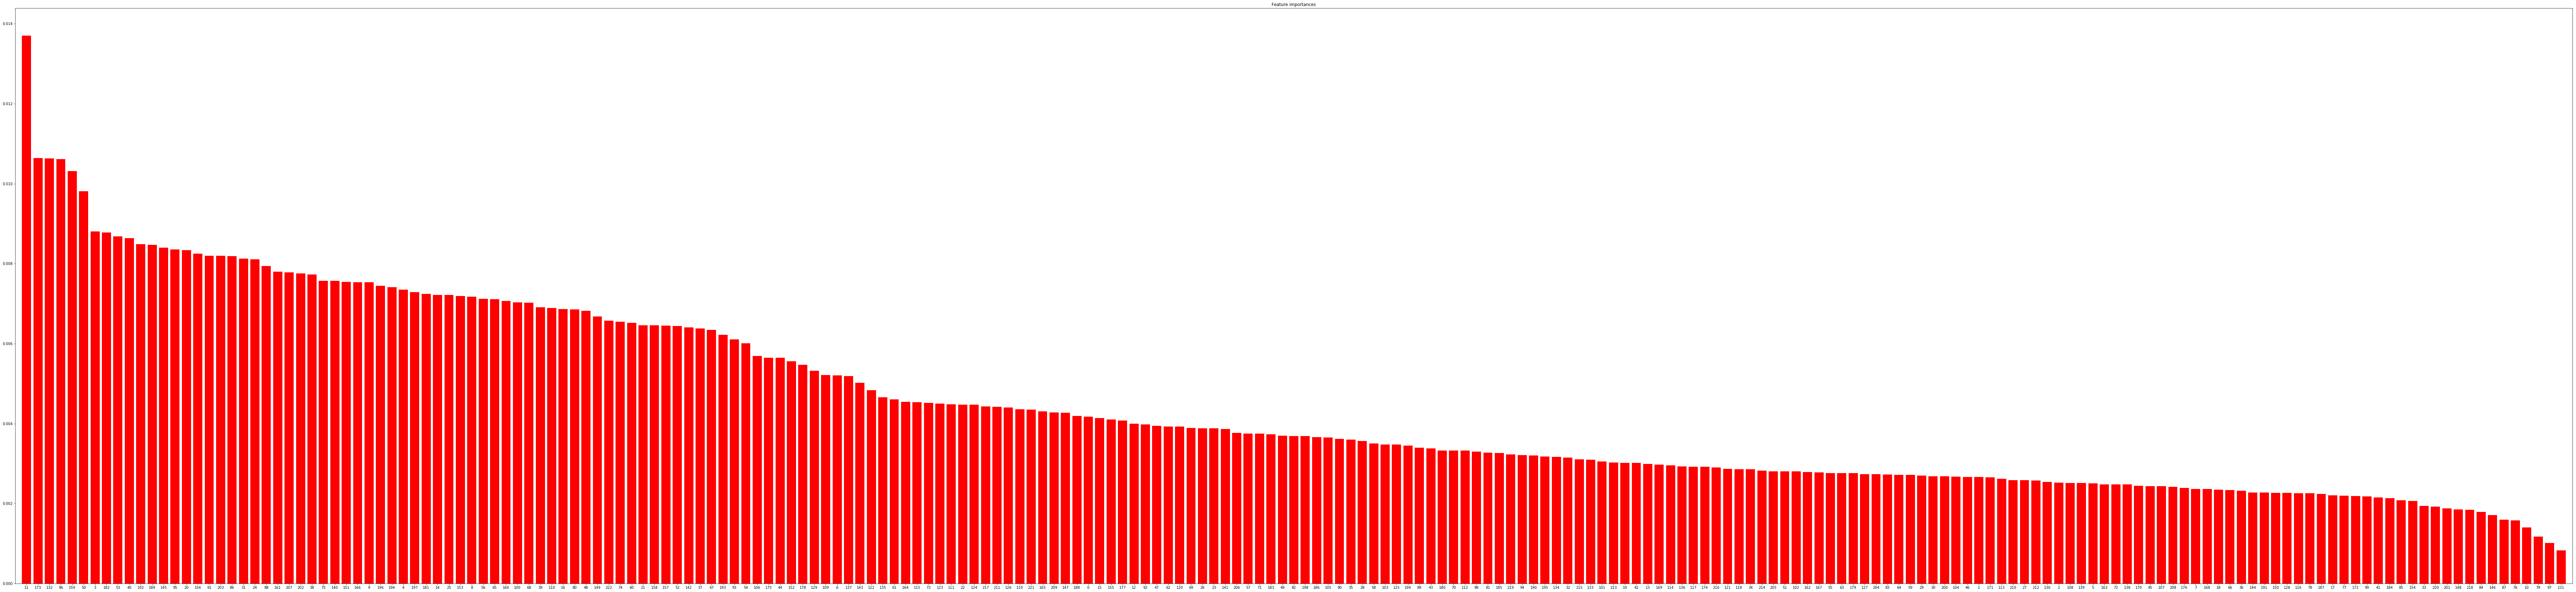

0.83519649915529237

In [38]:
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)
yy = (y[0] == 3)*1

model = XGBClassifier(n_estimators=1200,
                               nthread=8,
                               max_depth=15,
                                learning_rate=0.01,
                                colsample_bytree=0.5,
                               seed=4242)
model.fit(X, yy)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(130,30))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()



cross_val_score(model, X, yy, scoring='accuracy', cv=3).mean()

Feature ranking:
1. feature 3 (0.017261)
2. feature 21 (0.014155)
3. feature 11 (0.014123)
4. feature 67 (0.012201)
5. feature 196 (0.010952)
6. feature 120 (0.010792)
7. feature 156 (0.010632)
8. feature 25 (0.010472)
9. feature 50 (0.010408)
10. feature 24 (0.010408)
11. feature 189 (0.009575)
12. feature 93 (0.009383)
13. feature 222 (0.009255)
14. feature 159 (0.009159)
15. feature 86 (0.008967)
16. feature 31 (0.008743)
17. feature 129 (0.008743)
18. feature 65 (0.008454)
19. feature 80 (0.008390)
20. feature 132 (0.008262)
21. feature 23 (0.008230)
22. feature 52 (0.008134)
23. feature 56 (0.008134)
24. feature 74 (0.008102)
25. feature 75 (0.008070)
26. feature 142 (0.008070)
27. feature 123 (0.007974)
28. feature 138 (0.007910)
29. feature 14 (0.007878)
30. feature 160 (0.007846)
31. feature 9 (0.007750)
32. feature 194 (0.007718)
33. feature 182 (0.007462)
34. feature 217 (0.007462)
35. feature 158 (0.007366)
36. feature 207 (0.007366)
37. feature 39 (0.007302)
38. feature 91 

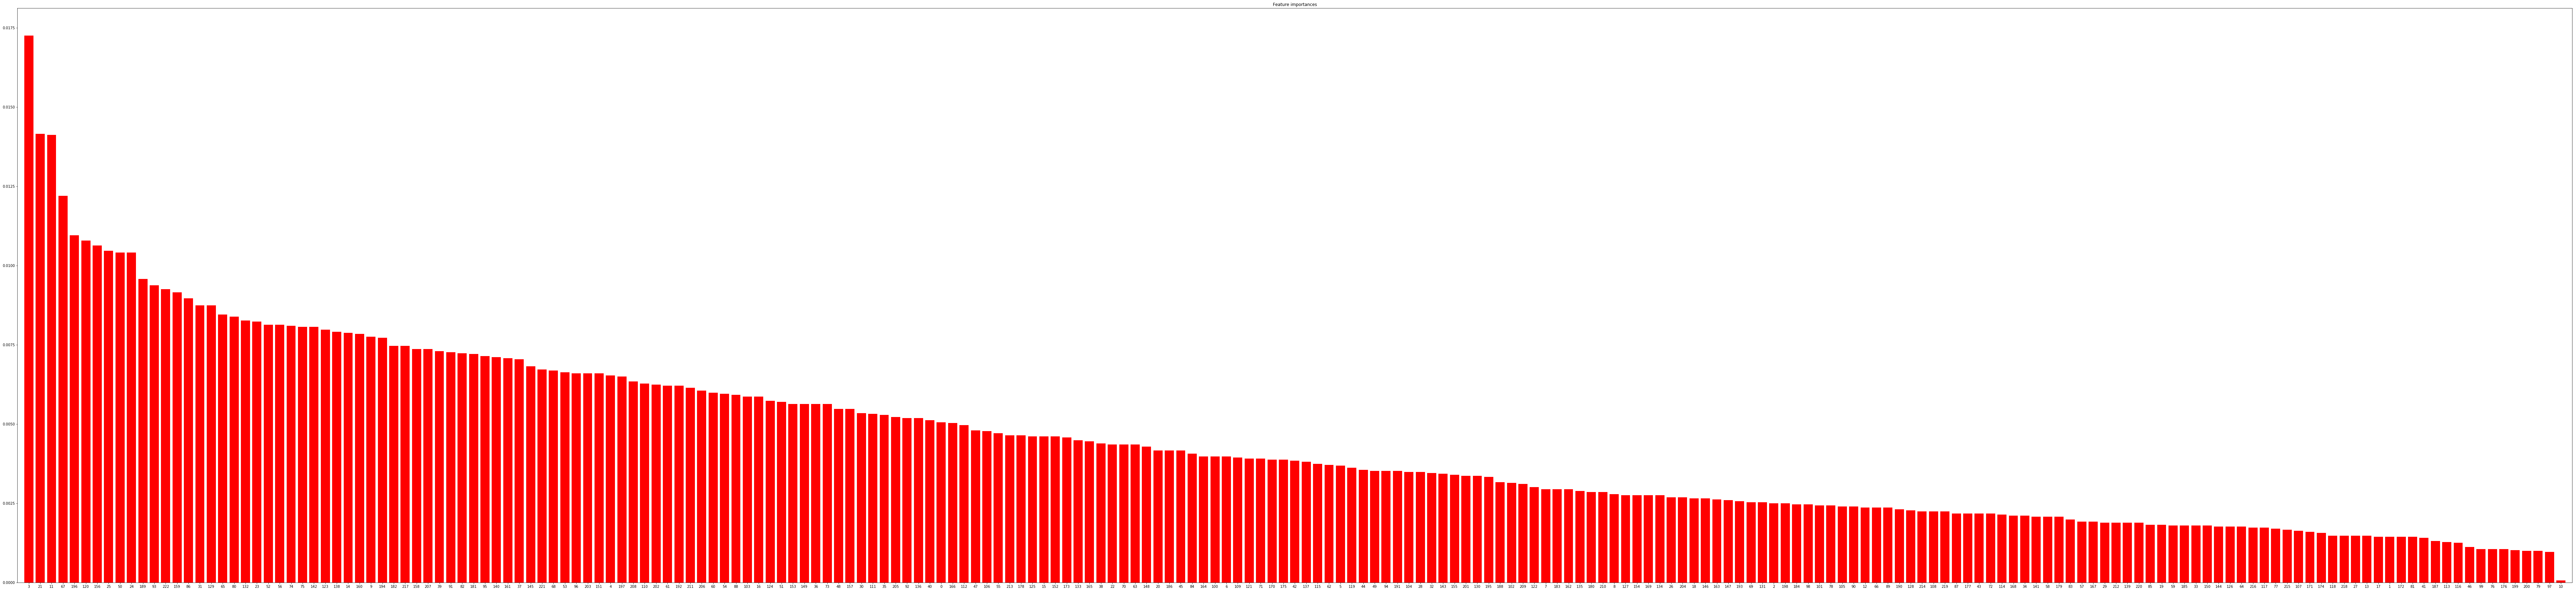

0.96847257262093878

In [39]:
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)
yy = (y[0] == 4)*1

model = XGBClassifier(n_estimators=1200,
                               nthread=8,
                               max_depth=15,
                                learning_rate=0.01,
                                colsample_bytree=0.5,
                               seed=4242)
model.fit(X, yy)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(130,30))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()



cross_val_score(model, X, yy, scoring='accuracy', cv=3).mean()